In [61]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import
from __future__ import unicode_literals

import os
import sys

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [62]:
sns.set()
sns.set_style("whitegrid")
sns.set_context("poster")

mpl.rcParams['figure.figsize'] = [8.0*2, 6.0*2]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 30
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['ytick.labelsize'] = 30
mpl.rcParams['xtick.labelsize'] = 30
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'


# Introduction

On fait des plots sur les runs

In [17]:
from problem.workflow import pprint

# Data

In [18]:
from problem.mnist import load_data

In [19]:
X, y = load_data()

# Load models

In [20]:
from problem.mnist import get_save_directory
from problem.mnist import preprocessing
from problem.mnist import skew
from problem.mnist import tangent
from problem.mnist import get_cv_iter

# from main import get_data_shape

In [21]:
def load_models(model_class, *args, **kwargs):
    models = []
    cv_iter = get_cv_iter(X, y)
    n_cv = len(cv_iter)
    pprint('Loading', n_cv, model_class.__name__)
    for i in range(n_cv):
        model = model_class(*args, **kwargs)
        save_directory = get_save_directory()
        model_name = '{}-{}'.format(model.get_name(), i)
        path = os.path.join(save_directory, model_name)
        model.load(path)
        models.append(model)
    return models

In [22]:
from models.mnist import NeuralNetModel
from models.mnist import AugmentedNeuralNetModel
from models.mnist import TangentPropModel
from models.mnist import AugmentedTangentPropModel
from models.mnist import PivotModel


# Test submission

In [23]:
from problem.mnist import test_submission


In [24]:
def get_mean_std(df_list):
    z = df_list[0]['z']
    acc = np.concatenate([df['error'].values.reshape(-1, 1) for df in df_list], axis=1)
    mean_acc = np.mean(acc, axis=1)
    std_acc = np.std(acc, axis=1)
    return mean_acc, std_acc

In [25]:
# z_list = list(range(-50, 51, 10)) + list(range(-5, 6, 1))
# z_list = sorted(z_list)
z_list = np.linspace(-10, 10, num=21)


In [26]:
print(z_list)

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]


In [27]:
NN_models = load_models(NeuralNetModel, n_steps=10000, batch_size=128, cuda=True)
df_list = test_submission(NN_models, X, y, z_list=z_list)
NN_mean_acc, NN_std_acc = get_mean_std(df_list)


2018-02-13 13:28:23 Loading 12 NeuralNetModel
2018-02-13 13:28:24 testing model 1/12
2018-02-13 13:29:03 testing model 2/12
2018-02-13 13:29:41 testing model 3/12
2018-02-13 13:30:19 testing model 4/12
2018-02-13 13:30:58 testing model 5/12
2018-02-13 13:31:36 testing model 6/12
2018-02-13 13:32:14 testing model 7/12
2018-02-13 13:32:52 testing model 8/12
2018-02-13 13:33:30 testing model 9/12
2018-02-13 13:34:08 testing model 10/12
2018-02-13 13:34:46 testing model 11/12
2018-02-13 13:35:27 testing model 12/12
2018-02-13 13:36:07 Done.


In [28]:
TP_L0_models = load_models(TangentPropModel, skewing_function=skew, trade_off=0.0, 
                           batch_size=128, n_steps=10000, cuda=True)
df_list = test_submission(TP_L0_models, X, y, z_list=z_list)
TP_L0_mean_acc, TP_L0_std_acc = get_mean_std(df_list)


2018-02-13 13:36:07 Loading 12 TangentPropModel
2018-02-13 13:36:08 testing model 1/12
2018-02-13 13:36:48 testing model 2/12
2018-02-13 13:37:28 testing model 3/12
2018-02-13 13:38:06 testing model 4/12
2018-02-13 13:38:46 testing model 5/12
2018-02-13 13:39:27 testing model 6/12
2018-02-13 13:40:09 testing model 7/12
2018-02-13 13:40:49 testing model 8/12
2018-02-13 13:41:28 testing model 9/12
2018-02-13 13:42:07 testing model 10/12
2018-02-13 13:42:49 testing model 11/12
2018-02-13 13:43:31 testing model 12/12
2018-02-13 13:44:12 Done.


In [29]:
TP_L01_models = load_models(TangentPropModel, skewing_function=skew, trade_off=0.1, 
                            batch_size=128, n_steps=10000, cuda=True )
df_list = test_submission(TP_L01_models, X, y, z_list=z_list)
TP_L01_mean_acc, TP_L01_std_acc = get_mean_std(df_list)


2018-02-13 13:44:12 Loading 12 TangentPropModel
2018-02-13 13:44:13 testing model 1/12
2018-02-13 13:44:51 testing model 2/12
2018-02-13 13:45:32 testing model 3/12
2018-02-13 13:46:14 testing model 4/12
2018-02-13 13:46:55 testing model 5/12
2018-02-13 13:47:37 testing model 6/12
2018-02-13 13:48:17 testing model 7/12
2018-02-13 13:48:56 testing model 8/12
2018-02-13 13:49:35 testing model 9/12
2018-02-13 13:50:14 testing model 10/12
2018-02-13 13:50:53 testing model 11/12
2018-02-13 13:51:32 testing model 12/12
2018-02-13 13:52:11 Done.


In [30]:
TP_L001_models = load_models(TangentPropModel, skewing_function=skew, trade_off=0.01, 
                             batch_size=128, n_steps=10000, cuda=True )
df_list = test_submission(TP_L001_models, X, y, z_list=z_list)
TP_L001_mean_acc, TP_L001_std_acc = get_mean_std(df_list)


2018-02-13 13:52:11 Loading 12 TangentPropModel
2018-02-13 13:52:12 testing model 1/12
2018-02-13 13:52:50 testing model 2/12
2018-02-13 13:53:29 testing model 3/12
2018-02-13 13:54:10 testing model 4/12
2018-02-13 13:54:51 testing model 5/12
2018-02-13 13:55:32 testing model 6/12
2018-02-13 13:56:13 testing model 7/12
2018-02-13 13:56:55 testing model 8/12
2018-02-13 13:57:35 testing model 9/12
2018-02-13 13:58:14 testing model 10/12
2018-02-13 13:58:54 testing model 11/12
2018-02-13 13:59:34 testing model 12/12
2018-02-13 14:00:15 Done.


In [31]:
TP_L1_models = load_models(TangentPropModel, skewing_function=skew, trade_off=1.0, 
                           batch_size=128, n_steps=10000, cuda=True )
df_list = test_submission(TP_L1_models, X, y, z_list=z_list)
TP_L1_mean_acc, TP_L1_std_acc = get_mean_std(df_list)


2018-02-13 14:00:15 Loading 12 TangentPropModel
2018-02-13 14:00:16 testing model 1/12
2018-02-13 14:00:57 testing model 2/12
2018-02-13 14:01:36 testing model 3/12
2018-02-13 14:02:15 testing model 4/12
2018-02-13 14:02:54 testing model 5/12
2018-02-13 14:03:33 testing model 6/12
2018-02-13 14:04:12 testing model 7/12
2018-02-13 14:04:50 testing model 8/12
2018-02-13 14:05:28 testing model 9/12
2018-02-13 14:06:06 testing model 10/12
2018-02-13 14:06:45 testing model 11/12
2018-02-13 14:07:23 testing model 12/12
2018-02-13 14:08:02 Done.


In [32]:
TP_L10_models = load_models(TangentPropModel, skewing_function=skew, trade_off=10.0, 
                            batch_size=128, n_steps=10000, cuda=True )
df_list = test_submission(TP_L10_models, X, y, z_list=z_list)
TP_L10_mean_acc, TP_L10_std_acc = get_mean_std(df_list)


2018-02-13 14:08:02 Loading 12 TangentPropModel
2018-02-13 14:08:03 testing model 1/12
2018-02-13 14:08:42 testing model 2/12
2018-02-13 14:09:20 testing model 3/12
2018-02-13 14:09:59 testing model 4/12
2018-02-13 14:10:40 testing model 5/12
2018-02-13 14:11:22 testing model 6/12
2018-02-13 14:12:03 testing model 7/12
2018-02-13 14:12:41 testing model 8/12
2018-02-13 14:13:20 testing model 9/12
2018-02-13 14:13:58 testing model 10/12
2018-02-13 14:14:37 testing model 11/12
2018-02-13 14:15:16 testing model 12/12
2018-02-13 14:15:57 Done.


In [70]:
TP_L100_models = load_models(TangentPropModel, skewing_function=skew, trade_off=100.0, 
                            batch_size=128, n_steps=10000, cuda=True )
df_list = test_submission(TP_L100_models, X, y, z_list=z_list)
TP_L100_mean_acc, TP_L100_std_acc = get_mean_std(df_list)


2018-02-13 14:23:46 Loading 12 TangentPropModel
2018-02-13 14:23:46 testing model 1/12
2018-02-13 14:24:26 testing model 2/12
2018-02-13 14:25:05 testing model 3/12
2018-02-13 14:25:43 testing model 4/12
2018-02-13 14:26:21 testing model 5/12
2018-02-13 14:27:02 testing model 6/12
2018-02-13 14:27:42 testing model 7/12
2018-02-13 14:28:21 testing model 8/12
2018-02-13 14:29:00 testing model 9/12
2018-02-13 14:29:39 testing model 10/12
2018-02-13 14:30:17 testing model 11/12
2018-02-13 14:30:56 testing model 12/12
2018-02-13 14:31:34 Done.


# Plot


- What about confusion matrices ???


## Accuracy

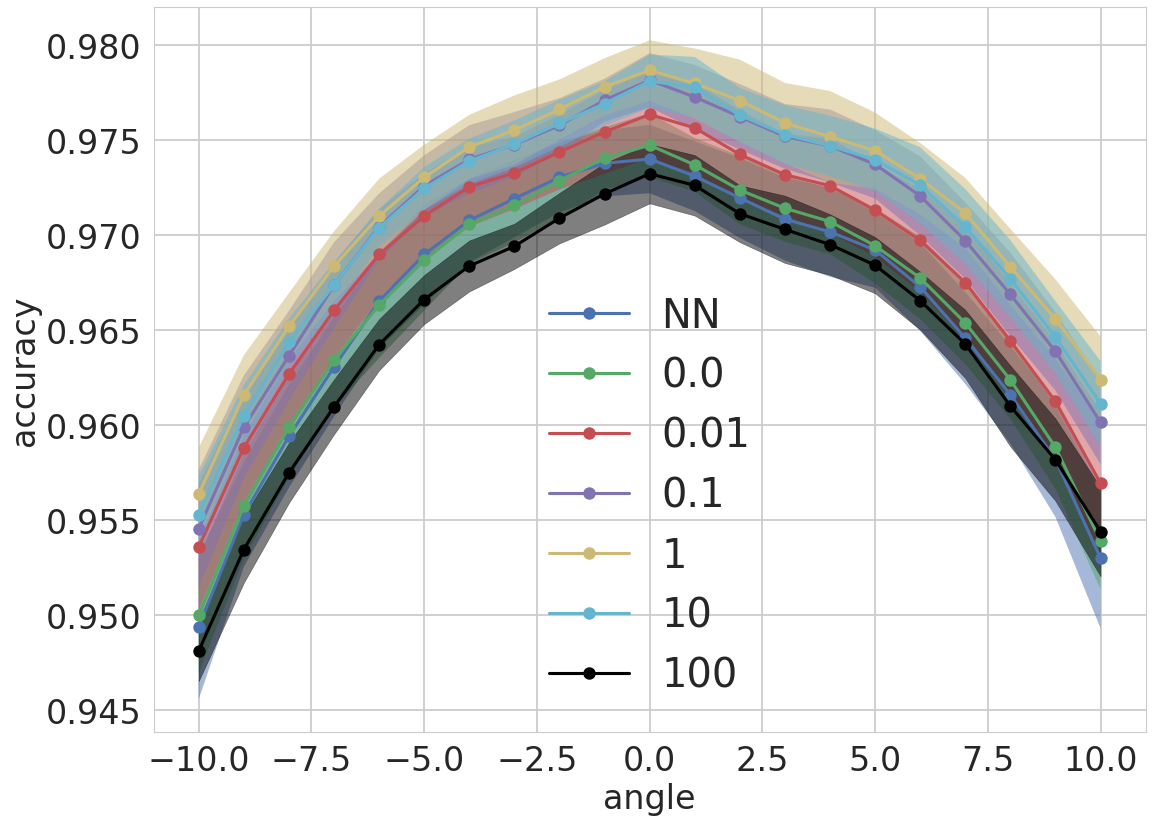

In [74]:
z = z_list

plt.plot(z, NN_mean_acc, 'o-', label='NN')
plt.fill_between(z, NN_mean_acc+NN_std_acc, NN_mean_acc-NN_std_acc, alpha=0.5)

plt.plot(z, TP_L0_mean_acc, 'o-', label='0.0')
plt.fill_between(z, TP_L0_mean_acc+TP_L0_std_acc, TP_L0_mean_acc-TP_L0_std_acc, alpha=0.5)

plt.plot(z, TP_L001_mean_acc, 'o-', label='0.01')
plt.fill_between(z, TP_L001_mean_acc+TP_L001_std_acc, TP_L001_mean_acc-TP_L001_std_acc, alpha=0.5)

plt.plot(z, TP_L01_mean_acc, 'o-', label='0.1')
plt.fill_between(z, TP_L01_mean_acc+TP_L01_std_acc, TP_L01_mean_acc-TP_L01_std_acc, alpha=0.5)

plt.plot(z, TP_L1_mean_acc, 'o-', label='1')
plt.fill_between(z, TP_L1_mean_acc+TP_L1_std_acc, TP_L1_mean_acc-TP_L1_std_acc, alpha=0.5)

plt.plot(z, TP_L10_mean_acc, 'o-', label='10')
plt.fill_between(z, TP_L10_mean_acc+TP_L10_std_acc, TP_L10_mean_acc-TP_L10_std_acc, alpha=0.5)

plt.plot(z, TP_L100_mean_acc, 'o-', label='100', c='k')
plt.fill_between(z, TP_L100_mean_acc+TP_L100_std_acc, TP_L100_mean_acc-TP_L100_std_acc, alpha=0.5, color='k')


plt.xlabel('angle')
plt.ylabel('accuracy')
plt.legend()
plt.show()


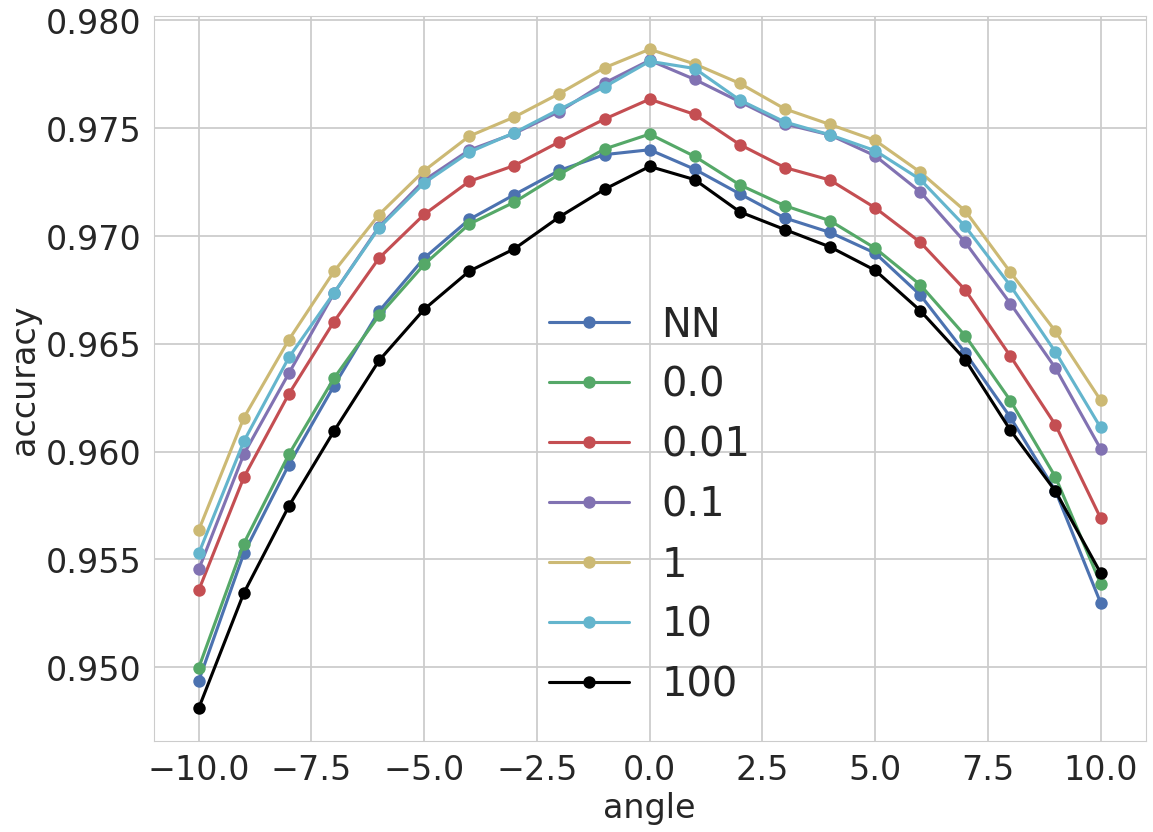

In [75]:
z = z_list

plt.plot(z, NN_mean_acc, 'o-', label='NN')
# plt.fill_between(z, NN_mean_acc+NN_std_acc, NN_mean_acc-NN_std_acc, alpha=0.5)

plt.plot(z, TP_L0_mean_acc, 'o-', label='0.0')
# plt.fill_between(z, TP_L0_mean_acc+TP_L0_std_acc, TP_L0_mean_acc-TP_L0_std_acc, alpha=0.5)

plt.plot(z, TP_L001_mean_acc, 'o-', label='0.01')
# plt.fill_between(z, TP_L001_mean_acc+TP_L001_std_acc, TP_L001_mean_acc-TP_L001_std_acc, alpha=0.5)

plt.plot(z, TP_L01_mean_acc, 'o-', label='0.1')
# plt.fill_between(z, TP_L01_mean_acc+TP_L01_std_acc, TP_L01_mean_acc-TP_L01_std_acc, alpha=0.5)

plt.plot(z, TP_L1_mean_acc, 'o-', label='1')
# plt.fill_between(z, TP_L1_mean_acc+TP_L1_std_acc, TP_L1_mean_acc-TP_L1_std_acc, alpha=0.5)

plt.plot(z, TP_L10_mean_acc, 'o-', label='10')
# plt.fill_between(z, TP_L10_mean_acc+TP_L10_std_acc, TP_L10_mean_acc-TP_L10_std_acc, alpha=0.5)

plt.plot(z, TP_L100_mean_acc, 'o-', label='100', color='k')
# plt.fill_between(z, TP_L100_mean_acc+TP_L100_std_acc, TP_L100_mean_acc-TP_L100_std_acc, alpha=0.5)


plt.xlabel('angle')
plt.ylabel('accuracy')
plt.legend()
plt.show()


## Losses

In [63]:
# NN_models = load_models(NeuralNetModel, n_steps=10000, batch_size=128, cuda=True)
# TP_L0_models = load_models(TangentPropModel, skewing_function=skew, trade_off=0.0, 
#                              batch_size=128, n_steps=10000, cuda=True )
# TP_L001_models = load_models(TangentPropModel, skewing_function=skew, trade_off=0.01, 
#                              batch_size=128, n_steps=10000, cuda=True )


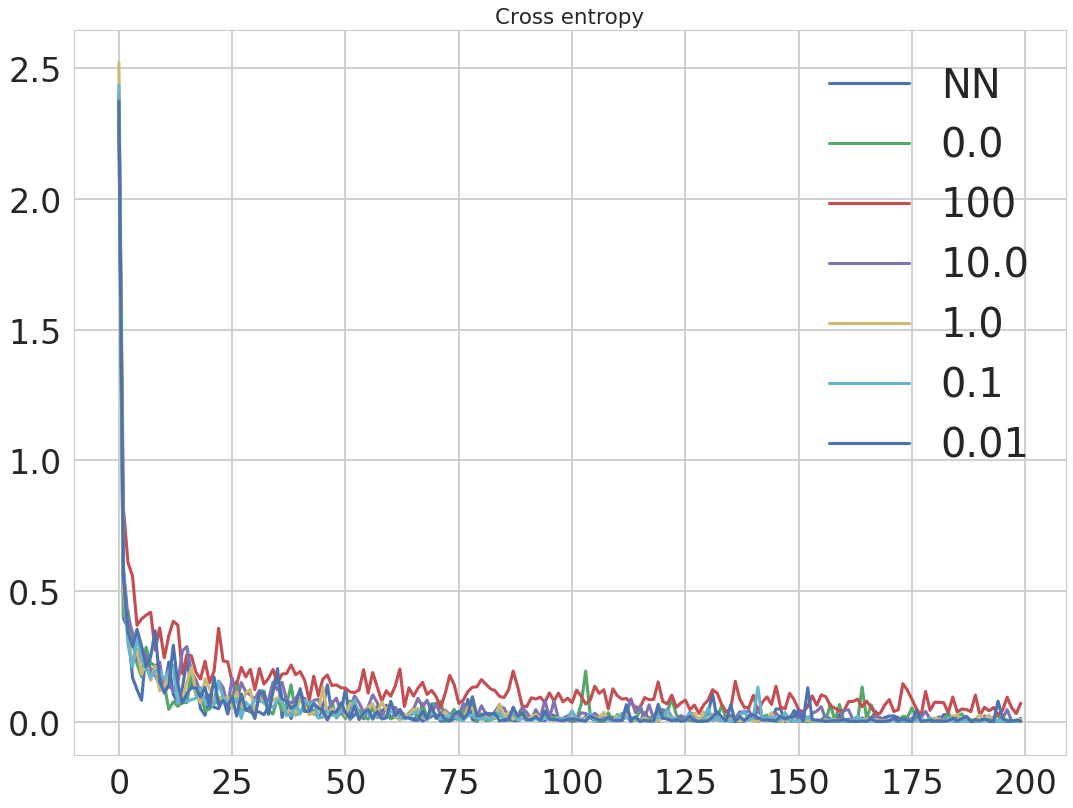

In [79]:
i = 0
plt.plot(NN_models[i].loss_hook.losses[::50], label='NN')
plt.plot(TP_L0_models[i].loss_hook.losses[::50], label='0.0')
plt.plot(TP_L100_models[i].loss_hook.losses[::50], label='100')
plt.plot(TP_L10_models[i].loss_hook.losses[::50], label='10.0')
plt.plot(TP_L1_models[i].loss_hook.losses[::50], label='1.0')
plt.plot(TP_L01_models[i].loss_hook.losses[::50], label='0.1')
plt.plot(TP_L001_models[i].loss_hook.losses[::50], label='0.01')
plt.title('Cross entropy')
plt.legend()
plt.show()

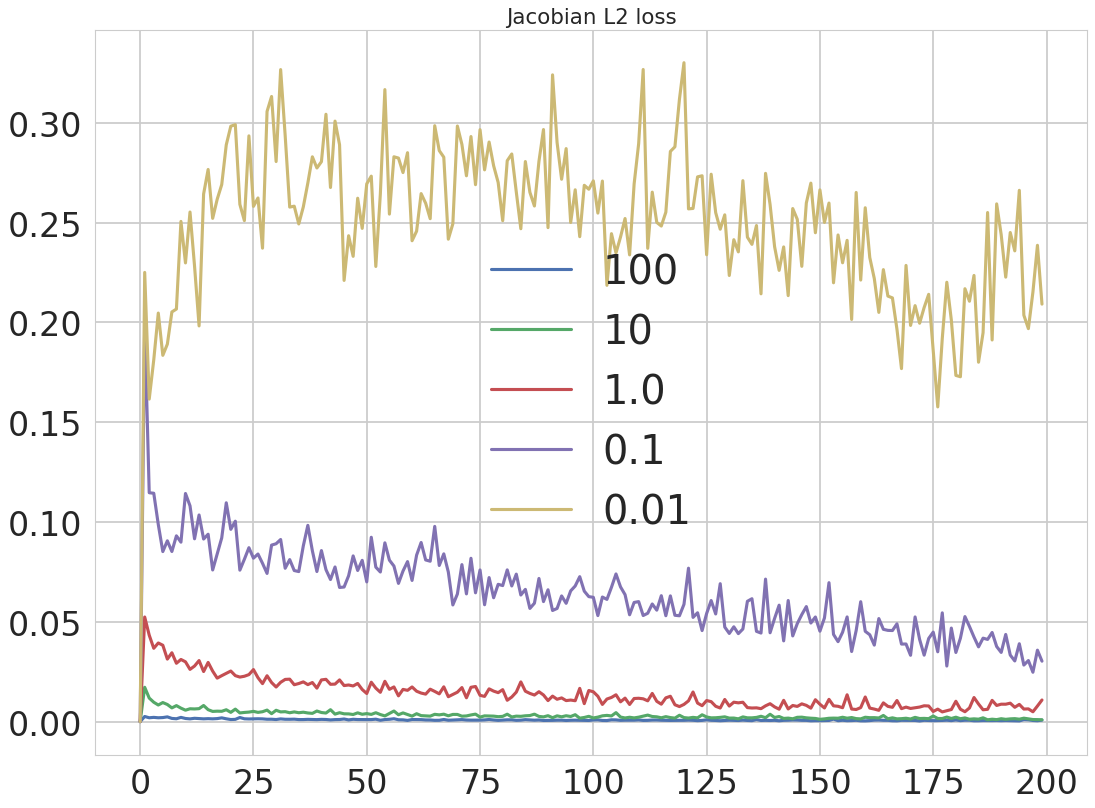

In [80]:
i = 0
plt.plot(TP_L100_models[i].jloss_hook.losses[::50], label='100')
plt.plot(TP_L10_models[i].jloss_hook.losses[::50], label='10')
plt.plot(TP_L1_models[i].jloss_hook.losses[::50], label='1.0')
plt.plot(TP_L01_models[i].jloss_hook.losses[::50], label='0.1')
plt.plot(TP_L001_models[i].jloss_hook.losses[::50], label='0.01')
plt.title('Jacobian L2 loss')
plt.legend()
plt.show()

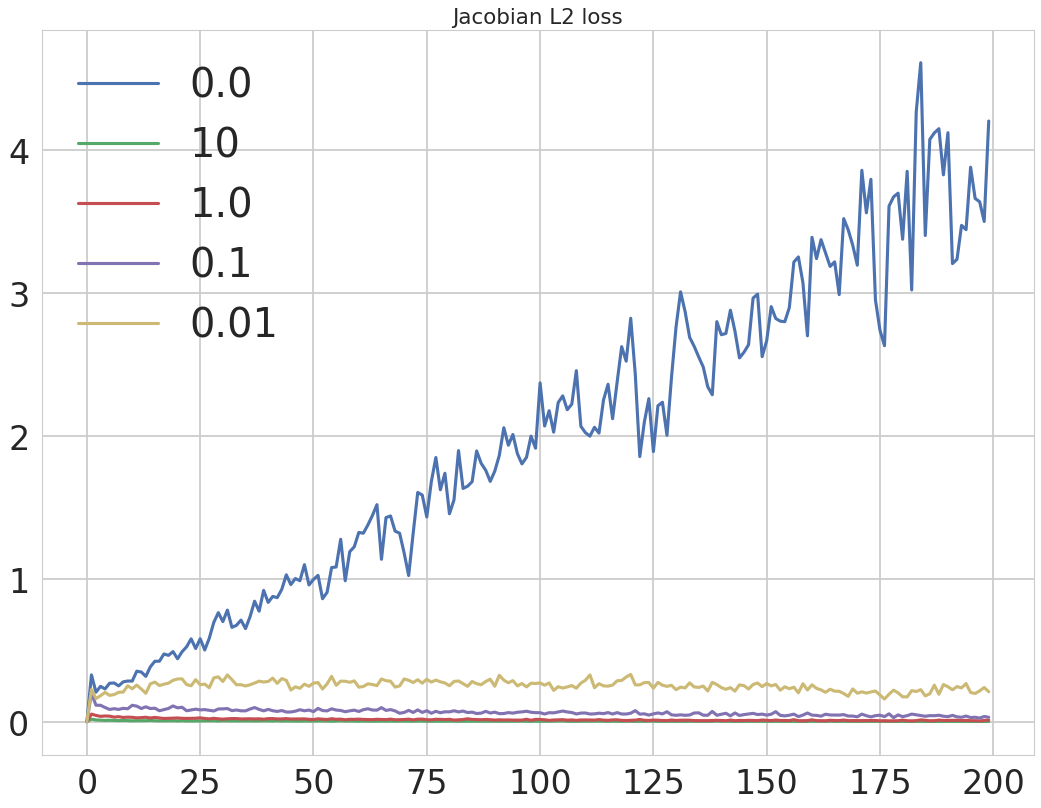

In [69]:
plt.plot(TP_L0_models[0].jloss_hook.losses[::50], label='0.0')
plt.plot(TP_L10_models[0].jloss_hook.losses[::50], label='10')
plt.plot(TP_L1_models[0].jloss_hook.losses[::50], label='1.0')
plt.plot(TP_L01_models[0].jloss_hook.losses[::50], label='0.1')
plt.plot(TP_L001_models[0].jloss_hook.losses[::50], label='0.01')
plt.title('Jacobian L2 loss')
plt.legend()
plt.show()

# Playground

In [39]:
# i = 0
# m = models[i]
# cv_iter = get_cv_iter(X, y)
# idx_dev, idx_valid = cv_iter[i]
# X_test = X[idx_valid]
# y_test = y[idx_valid]
# acc = accuracy_score(y_test, m.predict(X_test))

# print(acc)


In [40]:
# XX = skew(X_test, z=80)
# y_pred = m.predict(XX)
# acc = accuracy_score(y_test, m.predict(XX))
# print(acc)

# i = np.random.randint(0, XX.shape[0])
# plt.imshow(XX[i].reshape(28,28))

# plt.title('label = {}<->truth = {}'.format(y_pred[i], y_test[i]))
# plt.show()

# plt.imshow(X_test[i].reshape(28,28))
# plt.show()


In [41]:
# X_test.shape

In [42]:
# from myNNDA import data_augment

In [43]:
# XX = X[:200]
# yy = y[:200]
# XX2, yy, _ = data_augment(XX, yy, None)

In [44]:
# i = 67
# x = XX2[i].reshape(28, 28)
# plt.imshow(x, cmap='Greys')
# plt.title('skewed')
# plt.show()
# x = XX[i].reshape(28, 28)
# plt.imshow(x, cmap='Greys')
# plt.title('original')
# plt.show()